# COGS 108 Final Project

# Overview
<p>Our project uses regression and decision trees to predict the effect of different factors belonging to 5 categories (Education, Income, Sex Orientation, Race and Fidelity) on the quality of a relationship. We first trained our model with 80% of the data using regression analysis, but our regression model did not provide us with clear predictive results. We then switched to a decision tree model, which works better with categorical data. Using the decision tree model, we were able to complete our predictions with a higher precision and come to a conclusion.</p>

<h1>Names</h1> 
<ul>
    <li>Hongyu Zou</li>
    <li>Sergio Villazon</li>
    <li>Marissa Valenzuela</li>
    <li>Mathew Sanouvong</li>
    <li>Godwin Pang</li>
</ul>

<h1>Group Member IDs</h1> 
<ul>
    <li>A14553614</li>
    <li>A13495944</li>
    <li>A13873376</li>
    <li>A14159017</li>
    <li>A15325500</li>
</ul>

# Part 1: Introduction

## Background & Prior Work

A number of organizations have aimed to understand how personal qualities may contribute to the overall quality of a relationship. For instance, the dataset we are using is from Rosenfeld, Michael J., Reuben J. Thomas, and Sonia Hausen. 2019 How Couples Meet and Stay Together 2017 Fresh Sample. Stanford, CA: Stanford University Libraries. This research used a random questionnaire to ask couples about their use of online dating services and 3500 participant data points were collected from couples answering the questionnaire. For background information, we noticed in the book Cyberspace Romance: The Psychology of Online Relationships, authors Monica Whitty and Adrian Carr theorize that the world of cyberspace might prove to be more freeing than the real world for dating, allowing participants to be more experimental when approaching relationships. They also note that individuals might be more “comfortable presenting different aspects of themselves in different spaces online” [1] However, A study from 2006 claims that those participating in virtual relationships reported significantly lower intimacy on the Stenberg and Rubin Scales eventually stating that “relationships that develop online are not likely to result in greater intimacy than the levels experienced by individuals in their face-to-face relationships.” [2]

Sources: [1] Garcia, Agnaldo. (2007). Cyberspace Romance: The Psychology of Online Relationships. Interpersona: An International Journal on Personal Relationships. 1. 221-223. 10.5964/ijpr.v1 https://interpersona.psychopen.eu/article/view/15/pdf [2] Scott, Veronica M., Karen E. Mottarella, and Maria J. Lavooy. "Does virtual intimacy exist? A brief exploration into reported levels of intimacy in online relationships." CyberPsychology & Behavior 9.6 (2006): 759-761.i2.15. https://www.ncbi.nlm.nih.gov/pubmed/17201602

## Reformulated Research Question

<p style="font-size:15px"><b>General Question:</b> Which features amongst people result in the highest quality of romantic relationships with their partners?
</p>
<p style="font-size:15px">
<b>Specific Question:</b> How do certain factors between romantic partners compare to others when gauging the quality of their romantic relationship?
</p>
<p>

## Hypothesis

<p style="font-size:15px" >
Race may be the biggest factor to consider between couples when measuring the quality of their relationship due in part to the cultural differences or similarities that may result between the romantic partners, while other factors may fall short in importance.
</p>

## Datasets

<b style="font-size:15px">DATA: https://data.stanford.edu/hcmst2017
</b>
<p style="font-size:15px">
This public data set consists of survey results from the Stanford Couples Study that examines how couples meet. A key focus of the study is the trend in relationships that is shared between people with romantic partners. The survey consists of 3510 completed surveys consisting of adults age 18+ residing in the United States. Out of the variables contained in the dataset, we found the following to be the most applicable to our study:
<ul>
<li>How the couples met initially</li>
<li>Whether or not they used an online service to meet</li>
<li>Quality of relationship (Quantified to be 1-5)</li>
<li>Fidelity / Faithfulness of relationship</li>
<li>Sex Frequency</li>
</ul>
</p>

<p style="font-size:15px">
With this data set, we intend to extract information regarding the quality of the relationships. The questions asked in the survey span from demographic information about the participants to specific information regarding their relationship status with their romantic partners. After filtering out data irrelevant to our analysis, we will use work on web scraping the data to better visualize the responses. Our focus will be on gathering the information about certain aspects of a relationship such as race and education, and then finding responses that help us realize the quality of their relationship. Said information may include items such as whether the participant met their partner online or in person.
</p>

# Part 2: Setup & Data cleaning & Wrangling

<h3>1. import libraries</h3>

In [1]:
# Imports
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer
import patsy 
import scipy.stats as stats
import copy
import pydotplus
import io

from IPython.display import Image  
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

<h3>2. Read dataset and clean data</h3>

In [3]:
# read the preprocessed data into the dataframe
df_total = pd.read_csv('Relationship Data.csv')
df_total.head()

,Unnamed: 0,CaseID,CASEID_NEW,xlgb,...,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,0,2,2014039,LGB sample,...,12.0,14.0,12.0,14.0
1,1,3,2019003,gen pop,...,12.0,16.0,17.0,17.0
2,2,5,2145527,gen pop,...,9.0,7.5,14.0,17.0
3,3,6,2648857,gen pop,...,16.0,12.0,12.0,12.0
4,4,7,2623465,gen pop,...,14.0,17.0,16.0,16.0


<p>From the table, we picked the following five factors that we believed to have the biggest impact on the quality of a relationship.</p>

<ul>
    <li>Race</li>
    <li>Income</li>
    <li>Education</li>
    <li>Internet Use</li>
    <li>Sexual Orientation</li>
</ul>

<p><u>Detailed Explanation</u></p>
<ul>
    <li>Race</li>
        <ul>
            <li>Examine the race of both the questionnaire participant and their partner</li>
        </ul>
    <li>Income</li> 
        <ul>
            <li>Compare income of 2016 fiscal year between questionnaire participant and their partner</li>
        </ul>
    <li>Education</li>
        <ul>
            <li>Compare education level between questionnaire participant and their partner</li>
        </ul>
    <li>Internet Use</li> 
        <ul>
            <li>Examine whether or not online platforms were used to build up the relationship</li>
        </ul>
    <li>Sexual Orientation</li>
        <ul>
            <li>Examine ratios of straight couples vs. LGBTQ couples</li>
        </ul>
</ul>
    

In [4]:
# pick the five factors that could possibly influence the quality of relationship between couples
# The below columns are taken from the codebook for the dataset at https://stacks.stanford.edu/file/druid:vt073cc9067/HCMST_2017_fresh_Codeboodk_v1.1a.pdf

# race of the partner
df_race_partner = df_total['int_race'].to_frame()
df_race_answerer = df_total['Q6B'].to_frame()

# 2016 income for answerer and if his/her partner earns more than him/her
df_income_answerer = df_total['ppincimp'].to_frame()
df_income_partner = df_total['Q23'].to_frame()

# education level for both sides
df_edu_answerer = df_total['Q10'].to_frame()
df_edu_partner = df_total['ppeducat'].to_frame()

# internet use when dating
df_internet = df_total['Q32'].to_frame()

# if they are same sex people or not
df_sexOrient = df_total['w6_same_sex_couple'].to_frame()

<p><b>Drop missing values from the data</b></p>

In [5]:
df_race_answerer.dropna(inplace=True)
df_race_partner.dropna(inplace=True)
df_income_answerer.dropna(inplace=True)
df_income_partner.dropna(inplace=True)
df_edu_answerer.dropna(inplace=True)
df_edu_partner.dropna(inplace=True)
df_internet.dropna(inplace=True)
df_sexOrient.dropna(inplace=True)

<p>We use the responses to the following questions from the questionnaire to quantify the quality of a relationship</p>

<ul>
    <li>In general, how would you describe the quality of your relationship with your partner?</li>
    <li>During the last 12 months, about how often did you have sex with your partner?</li>
    <li>In the past year, have you ever met someone for dating, for romance, or for sex *besides* your partner?</li>
<ul>
        

In [6]:
# answerer's reply to their quality of relationship
df_quality = df_total['Q34'].to_frame()

# answerer's reply to their sex frequency
df_sexFreq = df_total['w6_sex_frequency'].to_frame()

# answer's reply about if they have other dates
df_other_date = df_total['w6_otherdate'].to_frame()

<p><b>Drop missing values from the data</b></p>

In [7]:
df_quality.dropna(inplace=True)
df_sexFreq.dropna(inplace=True)
df_other_date.dropna(inplace=True)

<p>We merge those columns together based on the index to have a better format of data. Since there is a one-to-one mapping in the original dataset between each index and each individual, so we can safely directly merge the columns together based on the index.</p>

In [8]:
# merge all the columns we have above together based on index
lst = [df_income_answerer, df_income_partner, df_edu_answerer, df_edu_partner, 
       df_internet, df_sexOrient, df_race_answerer, df_race_partner,
       df_quality, df_sexFreq, df_other_date]

df_individual = df_race_answerer

for ele in lst:
    df_individual = pd.merge(df_individual, ele, right_index = True, left_index = True)

In [9]:
df_individual.head()

,Q6B_x,ppincimp,Q23,Q10,...,int_race,Q34,w6_sex_frequency,w6_otherdate
1,White,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."
2,White,"$200,000 to $249,999",I earned more,Associate degree,...,White,Good,2 to 3 times a month,"No, I have not met anyone for dating, romance,..."
4,White,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,...,White,Excellent,3 to 6 times a week,"No, I have not met anyone for dating, romance,..."
5,White,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,...,White,Good,Once a month or less,"No, I have not met anyone for dating, romance,..."
6,White,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."


<p>Rename the columns to be name of the factors/ name of the quality measurement</p>

In [10]:
df_individual.drop("Q6B_x", axis = 1, inplace=True)
df_individual = df_individual.rename(columns={"Q6B_y": "race_partner", 
                                              "int_race" : "race_answerer", "ppincimp": "income", "Q23":"income_comp", 
                                              "Q10":"partner_degree", 
                                              "ppeducat" : "degree", "Q32":"met_through_internet", 
                                              'w6_same_sex_couple': "sex_orient",
                                              "Q34":"quality", "w6_sex_frequency":"sex_freq", 
                                              "w6_otherdate":"level_of_infidelity"})

df_individual.columns

Index(['income', 'income_comp', 'partner_degree', 'degree',
       'met_through_internet', 'sex_orient', 'race_partner', 'race_answerer',
       'quality', 'sex_freq', 'level_of_infidelity'],
      dtype='object')

<p>We clean the data and extract the data we want to analyze from the original dataset. We then display the table after cleaning.</p>

<h3> Before data transformation, an explanation of what each column means </h3>
<ul>
    <li> income - Income of the person who filled the survey (respondent) </li>
    <li> income_comp - Text describing whether the income of the partner of the respondent was more, less, or equal to the
        respondent's income </li>
    <li> partner_degree - The degree earned by the respondent'
     s partner </li>
    <li> degree - The degree earned by the respondent</li>
    <li> met_through_internet - Whether or not the pair met through the internet </li>
    <li> sex_orient - Whether the pair is a same sex couple or not</li>
    <li> race_partner - The race of the respondent's partner</li>
    <li> race_answerer - The race of the respondent</li>
    <li> quality - The quality of the relationship, as self-described by the respondent </li>
    <li> sex_freq - The frequency of sexual intercourse by the relationship, as decribed by the respondent </li>
    <li> level_of_infidelity - Whether the respondent met anyone other than the partner for sex, or romance</li>

</ul>

In [11]:
df_individual.head()

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,level_of_infidelity
1,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,Bachelor's degree or higher,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."
2,"$200,000 to $249,999",I earned more,Associate degree,Bachelor's degree or higher,...,White,Good,2 to 3 times a month,"No, I have not met anyone for dating, romance,..."
4,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,Bachelor's degree or higher,...,White,Excellent,3 to 6 times a week,"No, I have not met anyone for dating, romance,..."
5,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,High school,...,White,Good,Once a month or less,"No, I have not met anyone for dating, romance,..."
6,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",High school,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."


<h1>Part 3: Descriptive & Explanatory</h1>

<h2>Dataframe Summary</h2>
<p>Now we have our table regarding the aforementioned five factors to be examined and a quanifiable measurement of the quality of relationship between the questionnaire participant and their partners </p>

In [12]:
desc = df_individual.describe()
desc

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,level_of_infidelity
count,2856,2856,2856,2856,...,2856,2856,2856,2856
unique,21,5,15,4,...,17,6,6,3
top,"$100,000 to $124,999",[Partner Name] earned more,HS graduate or GED,Bachelor's degree or higher,...,White,Excellent,Once a month or less,"No, I have not met anyone for dating, romance,..."
freq,388,1170,649,1085,...,2395,1706,969,2604


We can draw some simple conclusions from our the summary of dataset.
<ul>
    <li>From the summary of the dataset we know that after excluding the null values we still have more than 1000 number of samples, which still meets the requirements</li>
    <li> From the summary of income we can know:</li> 
        <ul>
            <li>Over 50% of the race of the answerers are white
            <li>Over 90% of the answerers have not dated with someone else during the current relation
            <li>Over 50% of the answerers have an excellent relationship with their partner
            <li>Over 37% of the answerers have an Bachelor's degree
            <li>Around 40% of the answerers' partners have higher income than them
            <li>Over 80% of the answerers did not use internet ways to date their partner
            <li>Over 90% of the answers are not same sex couple
            <li>Arouhnd 30% of the answers have sex frequency one month or less
        </ul>
</ul>

<p>
Because our dataset is collected based on random sampling, we assume that it contains no systematic errors and we thus assume that is an accurate reflection of the general case in the United States.</p>

<h2> First Model: linear regression </h2>
<p>We decide to use a predictive model based on regression to help the analysis of our model.</p>
<p>We decided to choose the "quality" column in our dataset as a measurement of quality of relationship compared to "sex frequency" and "if cheated" because:
  <ol>
      <li>More sex may not mean better relationship. Some couples may be in good relationships but their sex frequency may be low</li>
      <li>"Quality" is a direct subjective value to measure "quality of relationship" </li>
      <li>"Cheated" is a binary variable, which may not be good for regression model and additionaly, we cannot say "not cheated" means good relationship </li>
  </ol>

</p>
<p>Here are the steps we will follow to build our model and analyze the data</p>
<ul>
  <li>Transform categorical values from the table into comparable integers to obtain quantifiable measurements</li>
  <li>Train the regression model using the first half of the dataframe and build our model</li>
  <li>Attempt to predict the other half of the dataframe using the current regression model</li>
  <li>See if our model is strong enough for predicting result of relationship by observing the prediction accuracy</li>
  <li>Compare the effectiveness of different factors on the quality of relationship</li>
</ul>

<h3>1. Quantify categorical values from table</h3>
<p>We first transform the measurement of quality of relationship from categorical values into integers</p>

<h3>a. Map relationship quality to numerical categorical data</h3>
We transform the quality of the relationship into integer values in the following way:

<ul>
    <li>"Excellent" - 5</li>
    <li>"Good" - 4</li>
    <li>"Fair" - 3</li>
    <li>"Poor" - 2</li>
    <li>"Very Poor" - 1</li>
</ul>

In [13]:
dic = {"Excellent": 5, "Good": 4, "Fair":3, "Poor":2, "Very Poor":1}
df_individual['quality'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,level_of_infidelity
1,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,Bachelor's degree or higher,...,White,5,Once a month or less,"No, I have not met anyone for dating, romance,..."
2,"$200,000 to $249,999",I earned more,Associate degree,Bachelor's degree or higher,...,White,4,2 to 3 times a month,"No, I have not met anyone for dating, romance,..."
4,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,Bachelor's degree or higher,...,White,5,3 to 6 times a week,"No, I have not met anyone for dating, romance,..."
5,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,High school,...,White,4,Once a month or less,"No, I have not met anyone for dating, romance,..."
6,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",High school,...,White,5,Once a month or less,"No, I have not met anyone for dating, romance,..."


<h3>b. Map sex frequency to numerical categorical data</h3>
We transform the quality of the relationship into integer values in the following way:

<ul>
    <li>"Once a day or more" - 5</li>
    <li>"3 to 6 times a week" - 4</li>
    <li>"Once or twice a week" - 3</li>
    <li>"2 to 3 times a month" - 2</li>
    <li>"Once a month or less" - 1</li>
</ul>

In [14]:
# we predict that couples with a higher sex frequency have a higher quality relationship than those who have a lower sex frequency
dic = {"Once a day or more": 5, "3 to 6 times a week": 4, "Once or twice a week":3, "2 to 3 times a month":2, 
       "Once a month or less":1}
df_individual['sex_freq'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,race_answerer,quality,sex_freq,level_of_infidelity
1,"$150,000 to $174,999",[Partner Name] earned more,Masters degree,Bachelor's degree or higher,...,White,5,1,"No, I have not met anyone for dating, romance,..."
2,"$200,000 to $249,999",I earned more,Associate degree,Bachelor's degree or higher,...,White,4,2,"No, I have not met anyone for dating, romance,..."
4,"$175,000 to $199,999",[Partner Name] earned more,Bachelors degree,Bachelor's degree or higher,...,White,5,4,"No, I have not met anyone for dating, romance,..."
5,"$75,000 to $84,999",[Partner Name] earned more,Bachelors degree,High school,...,White,4,1,"No, I have not met anyone for dating, romance,..."
6,"$50,000 to $59,999",[Partner Name] earned more,"Some college, no degree",High school,...,White,5,1,"No, I have not met anyone for dating, romance,..."


<h3>c. Map income to numerical categorical data</h3>
We transform the income of the respondent into an integer value in the following way:

<ul>
    <li>Remove all dollar signs, commas, and spaces</li>
    <li>Since every respondent labeled their income as a category between <i> low </i> and <i>high</i>
    we take the average of those two values
    </li>
</ul>

In [15]:
# Helper Variables
change = False
avg_array = []

# Go through income in order to find the array 
for income in df_individual['income']:
    temp_string = income.split()
    try:
        # Get lower bounds if possible
        lower_bound = temp_string[0].replace("$","")
        lower_bound = int(lower_bound.replace(",",""))
    except ValueError:
        change = True
    try:
        # Get upper bounds if possible
        upper_bound = temp_string[2].replace("$","")
        upper_bound = int(upper_bound.replace(",",""))
        if change:
            lower_bound = upper_bound
            change = False
    except ValueError:
        upper_bound = lower_bound

    # Get average of lower and upper bounds
    average = np.average([lower_bound,upper_bound])
    avg_array.append(average)
    
# Assign it to a new column in the dataframe 
df_individual = df_individual.assign( int_income=avg_array )
df_individual['int_income'].head()

1    162499.5
2    224999.5
4    187499.5
5     79999.5
6     54999.5
Name: int_income, dtype: float64

<h3>d.Map income difference to numerical categorical data </h3>
We transform the income of the respondent's partner into integer values in the following way:

<ul>
    <li>"I earned more" - 2</li>
    <li>"Partner name earned more" - 1</li>
    <li>"Earned the same amount" - 0</li>
    <li>"[Partner Name] was not working for pay" - (-1)</li>
    <li>"Refused" - (-2)</li>
</ul>

In [16]:
income_comp = []

# Go through partner's income in order to find the array 
for income in df_individual['income_comp']:
    temp_string = income
    if temp_string  == '[Partner Name] earned more':
        output = 1
    elif temp_string == 'I earned more':
        output = 2
    elif temp_string == 'We earned about the same amount':
        output = 0
    elif temp_string == '[Partner Name] was not working for pay':
        output = -1 
    elif temp_string == 'Refused':
        output = -2
    
    income_comp.append(output)
df_individual = df_individual.assign( int_income_comp=income_comp )
df_individual['int_income_comp'].head()

1    1
2    2
4    1
5    1
6    1
Name: int_income_comp, dtype: int64

<h3>e. Map partner's education level to numerical categorical data </h3>
We transform the education level of the respondent's partner into integer values in the following way:

<ul>
    <li>"Professional or Doctorate degree" and "Master's degree - 4</li>
    <li>"Bachelor's Degreee" - 3</li>
    <li>"Associate degree" - 2</li>
    <li>"Some college, no degree" and "HS graduate or GED"- 1</li>
    <li> High school dropout - 0 </li>
    <li>Below high school - (-1)</li>
</ul>

In [17]:
education = []

# Go through partner's income in order to find the array 
for income in df_individual['partner_degree']:
    temp_string = income
    if temp_string  == 'Master\x92s degree'or temp_string == 'Professional or Doctorate degree':
        output = 4
    elif temp_string == 'Bachelor\x92s degree':
        output = 3
    elif temp_string == 'Associate degree':
        output = 2
    elif temp_string == 'Some college, no degree' or temp_string == 'HS graduate or GED':
        output = 1 
    elif temp_string == '12th grade no diploma' or temp_string == '11th grade' or temp_string == '10th grade' 
    or temp_string == '9th grade':
        output = 0
    else:
        output = -1 
    
    education.append(output)
df_individual = df_individual.assign( partner_degree=education )
df_individual['partner_degree'].head()

1    4
2    2
4    3
5    3
6    1
Name: partner_degree, dtype: int64

<h3>f. Map respondent's education level into numerical categorical data </h3>
We transform the education level of the respondent into integer values in the following way:

<ul>
    <li>"Bachelor's Degreee or higher" - 4</li>
    <li>"High School" - 3</li>
    <li>"Some college" - 2</li>
    <li>"Less than high school" - 1 </li>
</ul>

In [18]:
dic = {"Bachelor's degree or higher": 4, 'High school': 3, 'Some college':2,  'Less than high school':1}
df_individual['degree'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,sex_freq,level_of_infidelity,int_income,int_income_comp
1,"$150,000 to $174,999",[Partner Name] earned more,4,4,...,1,"No, I have not met anyone for dating, romance,...",162499.5,1
2,"$200,000 to $249,999",I earned more,2,4,...,2,"No, I have not met anyone for dating, romance,...",224999.5,2
4,"$175,000 to $199,999",[Partner Name] earned more,3,4,...,4,"No, I have not met anyone for dating, romance,...",187499.5,1
5,"$75,000 to $84,999",[Partner Name] earned more,3,3,...,1,"No, I have not met anyone for dating, romance,...",79999.5,1
6,"$50,000 to $59,999",[Partner Name] earned more,1,3,...,1,"No, I have not met anyone for dating, romance,...",54999.5,1


<h3>g. Map use of online tools to numerical categorical data</h3>
We transform the value of whether the pair met through the internet to boolean values in the following way:

<ul>
    <li>'Did not meet partner through internet' - 0</li>
    <li>"Met partner through internet" - 1</li>
</ul>

In [19]:
internet_array = []

# Go through partner's income in order to find the array 
for income in df_individual['met_through_internet']:
    temp_string = income
    if temp_string  == 'No, I did NOT meet [Partner Name] through the Internet':
        output = 0
    else: 
        output = 1
    internet_array.append(output)
df_individual = df_individual.assign( internet=internet_array )
df_individual['internet'].head()
    

1    0
2    1
4    0
5    0
6    0
Name: internet, dtype: int64

<h3>h. Map gender of couple to boolean data</h3>
We transform the value of whether the pair to boolean values in the following way:

<ul>
    <li>"same_sex_couple"- 0</li>
    <li>"NOT same-sex couple" - 1</li>
</ul>

In [20]:
dic = {'NOT same-sex couple': 1,  'same_sex_couple': 0}
df_individual['sex_orient'].replace(dic, inplace=True)


<h3>i. Map infidelity levels to numerical categorical data </h3>
We transform the respondent's answer of whether or not they had met someone else for dating, romance, or sex to numerical values in the following way:

<ul>
    <li>"No, I have not met anyone for dating, romance, or sex besides [Partner Name] in the past year."- 1</li>
    <li>"Yes, I have met at least one person for dating, romance, or sex besides [Partner Name] in  the past year." - 0</li>
    <li>"Refused" - 1 </li>
</ul>

In [21]:
dic ={ 'No, I have not met anyone for dating, romance, or sex besides [Partner Name] in the past year.': 1,
 'Yes, I have met at least one person for dating, romance, or sex besides [Partner Name] in  the past year.': 0,
 'Refused': -1 }
df_individual['level_of_infidelity'].replace(dic, inplace=True)
df_individual.head()

,income,income_comp,partner_degree,degree,...,level_of_infidelity,int_income,int_income_comp,internet
1,"$150,000 to $174,999",[Partner Name] earned more,4,4,...,1,162499.5,1,0
2,"$200,000 to $249,999",I earned more,2,4,...,1,224999.5,2,1
4,"$175,000 to $199,999",[Partner Name] earned more,3,4,...,1,187499.5,1,0
5,"$75,000 to $84,999",[Partner Name] earned more,3,3,...,1,79999.5,1,0
6,"$50,000 to $59,999",[Partner Name] earned more,1,3,...,1,54999.5,1,0


In [22]:
# drop columns that are redundant resulting from transformation
df_individual.drop(['income', 'income_comp'], inplace=True, axis=1)

# drop refused columns from quality
df_individual = df_individual[df_individual['quality'] != 'Refused']
df_individual['quality'].astype(str).astype(int)

1       5
2       4
4       5
       ..
3507    4
3508    4
3509    3
Name: quality, Length: 2847, dtype: int32

<h3>2. Training regression models using 80% of the data</h3>
<p> Following the 80/20 split as in the homework assignments, we try to use 80% of the model to train our regression model and then predict the 20% rest using the resulting model.</p>

In [23]:
# combine partner_degree and degree
df_individual['degree'] = df_individual['degree'] + df_individual['partner_degree']
df_individual.drop('partner_degree', inplace=True, axis=1)
df_individual.head()

,degree,met_through_internet,sex_orient,race_partner,...,level_of_infidelity,int_income,int_income_comp,internet
1,8,"No, I did NOT meet [Partner Name] through the ...",1,White,...,1,162499.5,1,0
2,6,"Yes, an Internet dating or matchmaking site (l...",1,White,...,1,224999.5,2,1
4,7,"No, I did NOT meet [Partner Name] through the ...",1,White,...,1,187499.5,1,0
5,6,"No, I did NOT meet [Partner Name] through the ...",1,White,...,1,79999.5,1,0
6,4,"No, I did NOT meet [Partner Name] through the ...",1,White,...,1,54999.5,1,0


In [24]:
# type cast df_quality row to be integer
df_individual['quality'] = df_individual['quality'].astype('int64')
df_individual['quality'].head()

1    5
2    4
4    5
5    4
6    5
Name: quality, dtype: int64

<h4>After we process the data, we can test the normality of data and try to run regression using OLS estimator </h4>

In [25]:
# test normality of data
st_de = stats.normaltest(df_individual['degree'])
st_in = stats.normaltest(df_individual['int_income'])
st_in_cmp = stats.normaltest(df_individual['int_income_comp'])
st_intrnt = stats.normaltest(df_individual['internet'])
st_sax = stats.normaltest(df_individual['sex_orient'])
st_date = stats.normaltest(df_individual['level_of_infidelity'])
st_quality = stats.normaltest(df_individual['quality'])

print(st_de, '\n', st_in, '\n', st_in_cmp, '\n', st_intrnt, '\n', st_sax, '\n', st_date, '\n', st_quality)

NormaltestResult(statistic=430.83476721535334, pvalue=2.788810424498101e-94) 
 NormaltestResult(statistic=258.59912504894044, pvalue=7.01315573686475e-57) 
 NormaltestResult(statistic=362.3726297688105, pvalue=2.05013872609045e-79) 
 NormaltestResult(statistic=1084.7623254329494, pvalue=2.798040162435333e-236) 
 NormaltestResult(statistic=1822.9332719357062, pvalue=0.0) 
 NormaltestResult(statistic=2048.090970282453, pvalue=0.0) 
 NormaltestResult(statistic=924.6411859626222, pvalue=1.6470910145760836e-201)


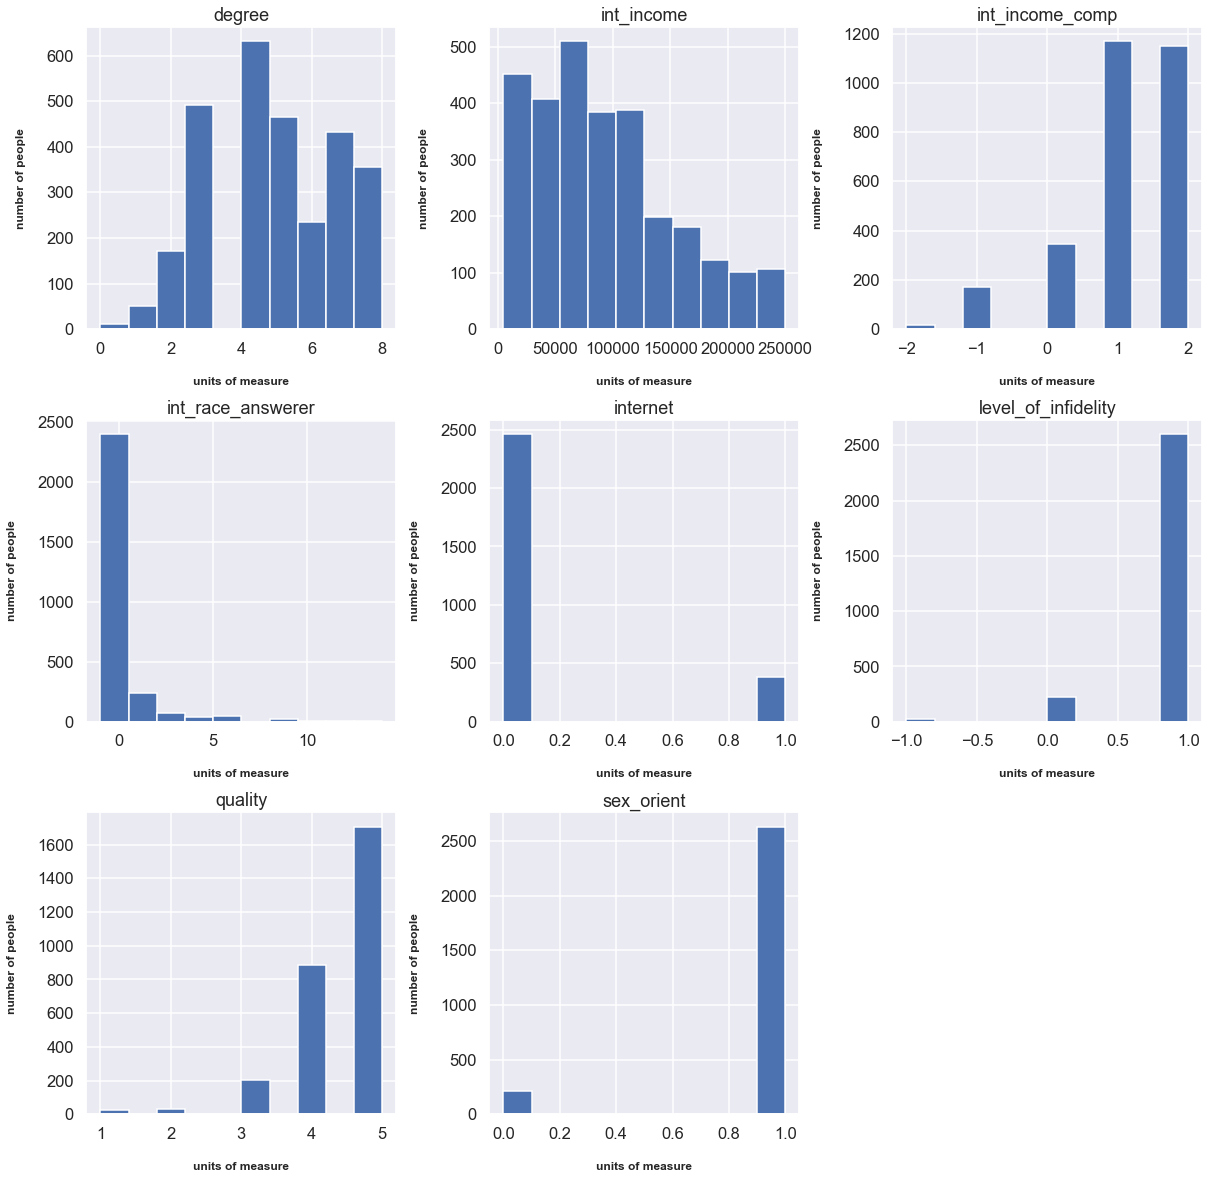

In [65]:
# plot graphs to see if data is normal visually
pl_columns = df_individual.hist(figsize=(20,20))
for y in pl_columns:
    for x in y:
        # Set x-axis label
        x.set_xlabel("units of measure", labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("number of people", labelpad=20, weight='bold', size=12)

In [27]:
# run regression to test, use quality as measure of quality of relationship
outcome_1, predictors_1 = patsy.dmatrices("quality ~ int_income + int_income_comp + degree + internet + sex_orient + level_of_infidelity", 
                                          df_individual[:2277])
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

# show the result of regression
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     31.16
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           3.67e-36
Time:                        18:43:16   Log-Likelihood:                -2453.5
No. Observations:                2277   AIC:                             4921.
Df Residuals:                    2270   BIC:                             4961.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8012      0.084     45.210      0.000       3.636       3.966
int_income           7.589e-07   2.67e-07      2.842      0.005    2.35e-07    1.28e-06
int_income_comp        -0.0476      0.017     -2.851      0.004      -0.080      -0.015
degree                  0.0379      0.009      4.315      0.000       0.021       0.055
internet               -0.0430      0.045     -0.946      0.344      -0.132       0.046
sex_orient              0.0101      0.060      0.168      0.866      -0.108       0.128
level_of_infidelity     0.5295      0.048     10.921      0.000       0.434       0.625
==============================================================================
Omnibus:                      727.887   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2329.534
Skew:                          -1.612   Prob(JB):                         0.00
Kurtosis:                       6.762   Cond. No.                     7.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# calculate the mean squared error
df_1 = df_individual
       [["int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]][2277:]

# original value
original_quality = df_individual["quality"][2277:]

# add constant
df_1['Intercept'] = [3.8012] * 570

# predicted value
predicted_quality = res_1.predict(
    df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]])

# calculate mean squared error
mean_squared_error(original_quality, predicted_quality)  

114.43241582370331

<h3> 3. Predict the rest 20% using current model </h3>

In [29]:
# predict the rest 20% using the current model
# quality ~ int_income + int_income_comp + degree + internet + sax_orient + other_date"
df_1 = df_individual
       [["int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]][2277:]

# add constant
df_1['Intercept'] = [3.8012] * 570

res_1.predict
(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]]).head()

2819    15.14
2820    15.11
2821    15.08
2822    14.98
2823    15.11
dtype: float64

<h3> 4. Conclusion for regression model 1 and switch to regression model 2</h3>
<p>From the above result, we observe that our R-squared is quite low and that we have a large mean squared error.
The predicted value was around 15, which is far off from the value we expected(0-5).
From the normality test, due to the p value being too small, we derive the conclusion that our data does not follow a normal distribution. Thus data normalization is required before running regression</p>

In [30]:
# try to normalize the data using log transformation
df_individual_cy = copy.deepcopy(df_individual)

# eliminate negative values and apply log transform
df_individual_cy['degree'] = df_individual_cy['degree'] + 1
df_individual_cy['degree'] = df_individual_cy['degree'].apply(np.log)

df_individual_cy['int_income_comp'] = df_individual_cy['int_income_comp'] + 3
df_individual_cy['int_income_comp'] = df_individual_cy['int_income_comp'].apply(np.log)

df_individual_cy['int_income'] = df_individual_cy['int_income'].apply(np.log)

In [31]:
# test normality of data
st_de = stats.normaltest(df_individual_cy['degree'])
st_in = stats.normaltest(df_individual_cy['int_income'])
st_in_cmp = stats.normaltest(df_individual_cy['int_income_comp'])
st_intrnt = stats.normaltest(df_individual_cy['internet'])
st_sax = stats.normaltest(df_individual_cy['sex_orient'])
st_date = stats.normaltest(df_individual_cy['level_of_infidelity'])
st_quality = stats.normaltest(df_individual_cy['quality'])

print(st_de, '\n', st_in, '\n', st_in_cmp, '\n', st_intrnt, '\n', st_sax, '\n', st_date, '\n', st_quality)

NormaltestResult(statistic=370.3911571976351, pvalue=3.720335802499582e-81) 
 NormaltestResult(statistic=294.61158182332576, pvalue=1.0614703185342484e-64) 
 NormaltestResult(statistic=1107.1721146184423, pvalue=3.807413557620934e-241) 
 NormaltestResult(statistic=1084.7623254329494, pvalue=2.798040162435333e-236) 
 NormaltestResult(statistic=1822.9332719357062, pvalue=0.0) 
 NormaltestResult(statistic=2048.090970282453, pvalue=0.0) 
 NormaltestResult(statistic=924.6411859626222, pvalue=1.6470910145760836e-201)


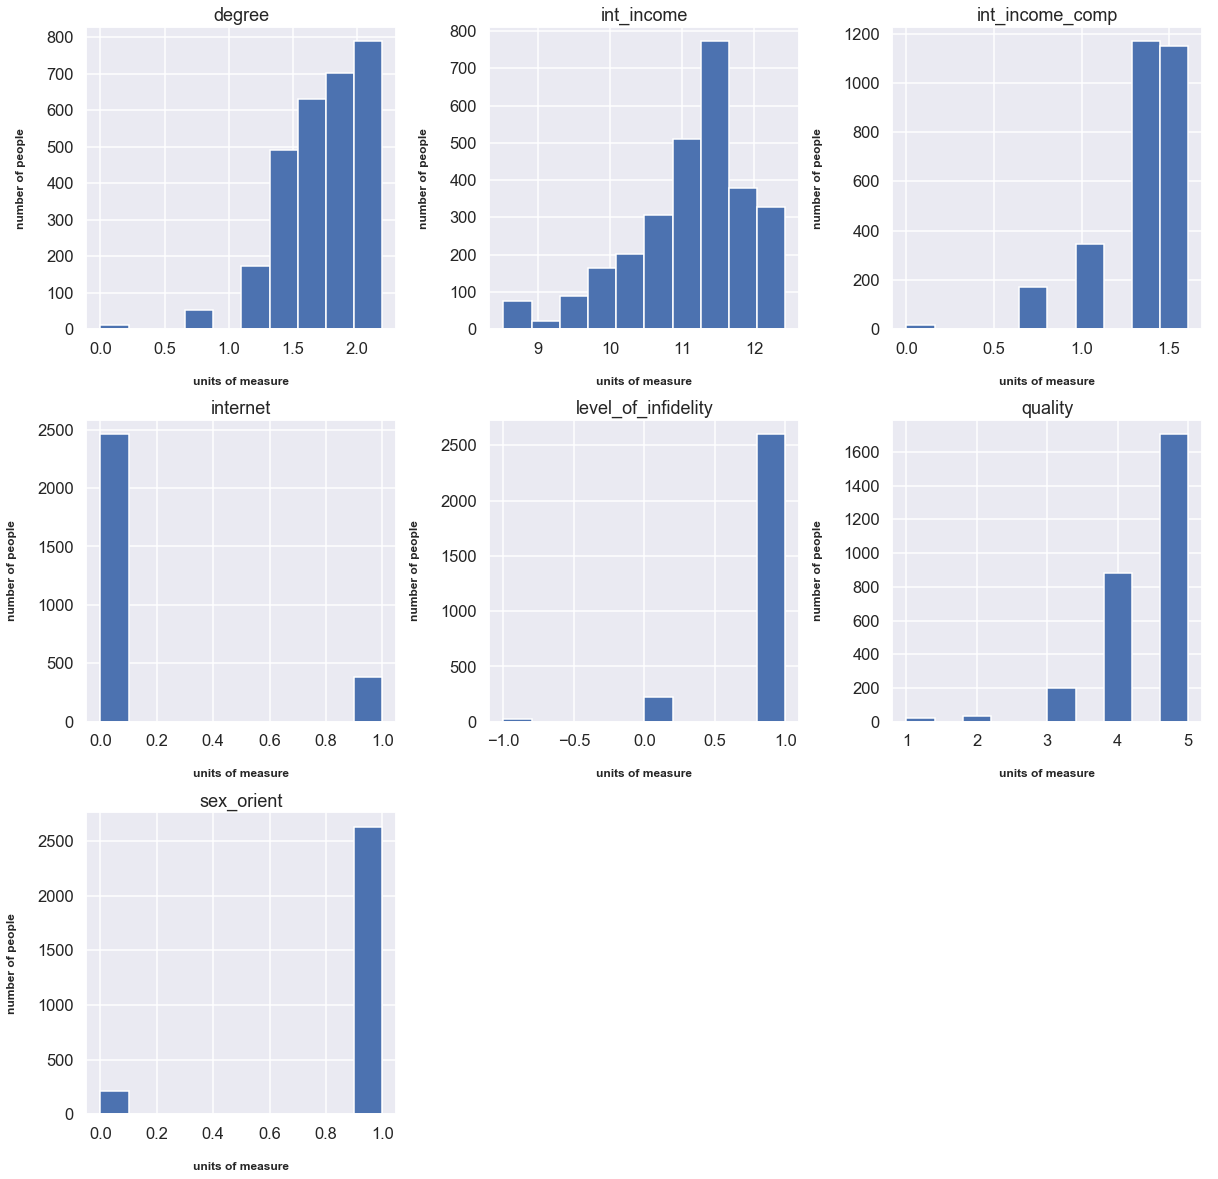

In [66]:
# look at chart to test normality
pl_columns = df_individual_cy.hist(figsize=(20,20))
for y in pl_columns:
    for x in y:
        # Set x-axis label
        x.set_xlabel("units of measure", labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("number of people", labelpad=20, weight='bold', size=12)

In [33]:
# display the log transformed table
df_individual_cy
[['degree', 'int_income', 'int_income_comp', 'internet', 'level_of_infidelity', 'quality', 'sex_orient']].head()

,degree,int_income,int_income_comp,internet,level_of_infidelity,quality,sex_orient
1,2.20,12.00,1.39,0,1,5,1
2,1.95,12.32,1.61,1,1,4,1
4,2.08,12.14,1.39,0,1,5,1
5,1.95,11.29,1.39,0,1,4,1
6,1.61,10.92,1.39,0,1,5,1


In [34]:
# run regression to test, use quality as measure of quality of relationship
outcome_1, predictors_1 = 
patsy.dmatrices("quality ~ int_income + int_income_comp + degree + internet + sex_orient + level_of_infidelity", 
                df_individual_cy[:2277])
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [35]:
# show the result of regression
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     33.03
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           2.35e-38
Time:                        18:43:17   Log-Likelihood:                -2448.4
No. Observations:                2277   AIC:                             4911.
Df Residuals:                    2270   BIC:                             4951.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.0615      0.215     14.268      0.000       2.641       3.482
int_income              0.0802      0.020      3.945      0.000       0.040       0.120
int_income_comp        -0.1866      0.057     -3.301      0.001      -0.298      -0.076
degree                  0.1824      0.047      3.853      0.000       0.090       0.275
internet               -0.0333      0.046     -0.732      0.464      -0.123       0.056
sex_orient              0.0059      0.060      0.099      0.921      -0.112       0.123
level_of_infidelity     0.5251      0.048     10.837      0.000       0.430       0.620
==============================================================================
Omnibus:                      713.606   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2237.406
Skew:                          -1.587   Prob(JB):                         0.00
Kurtosis:                       6.675   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>5. Predict the rest 20% using current model </h3>

In [36]:
# predict the rest 20% using the current model
# quality ~ int_income + int_income_comp + degree + internet + sax_orient + other_date"
df_1 = 
df_individual_cy[["int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]][2277:]

# add constant
df_1['Intercept'] = [3.0615] * 570

res_1.predict
(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]])
.head()

2819    10.85
2820    10.74
2821    10.73
2822    10.51
2823    10.79
dtype: float64

In [37]:
# calculate the mean squared error

# original value
original_quality = df_individual_cy["quality"][2277:]

# predicted value
predicted_quality = res_1.predict
(df_1[["Intercept", "int_income", "int_income_comp", "degree",  "internet", "sex_orient", "level_of_infidelity"]])

# calculate mean squared error
mean_squared_error(original_quality, predicted_quality)  

40.631486056759364

<h2>6. Model Analysis </h2>
<h3>Although we have a much smaller mean squared error and our predicted value is closer to 0-5, our model still does not produce satisfactory results. Below are several reasons that could possible explain why:</h3>

<h3>1. Samples might not be experimentally randomly selected</h3>
    <p>It is possible that our data is not from a perfect random sampling, which violates the OLS estimator assumption</p>

 <h3>2. No linear relationship between dependent variable and independent variable</h3>

Text(0, 0.5, 'units of measure')

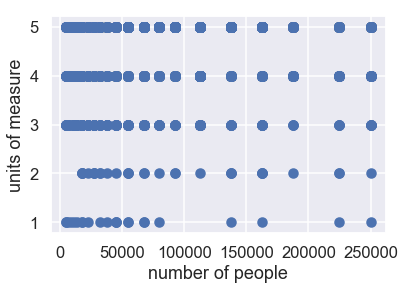

In [67]:
# draw scatter plot between quality and income
plt.scatter(df_individual["int_income"], df_individual["quality"])
plt.xlabel("number of people")
plt.ylabel("units of measure")

<p>As the example shown above, due to the categorical nature of our data, there is no obvious linear relationship between income and quality of relationship, we cannot directly run regression with income and quality.</p>

 <h3>3. Strong Multicollinearity</h3>
 <p>As per the regression results shown above, there is possible multicollinearity in our model, which could affect the precision of our regression model. For example, it is possible that income is correlated with education level as shown below</p>

In [39]:
df_individual[['int_income', 'degree']].corr()

,int_income,degree
int_income,1.00,0.46
degree,0.46,1.00


 <h3>4. Bias via Variable Omission </h3>
 <p>We only included a handful of variables that we want to analyze in our regression model, it is possible that there are other relevant variables that could possibly influence on the quality of relationship but we did not include in our regression model. And those variable will be explained by variable included in our current regression model, which will also decrease the effectiveness of our regression model</p>

<p>Becuase of the nature of our dataset (categorical variables, binary variables) and all the possible reasons listed above that could possibly cause our model to fail, we decided that we needed to consider another model that works better than linear regression</p>

<h2>Second Model: Decision Tree </h2>

<p> Add a separate column here 'comp_degree' that determines the degree of both the partner and the interviewee

In [40]:
df_individual['race_answerer'].unique()

array(['White', 'Black', 'Some other race', 'Asian Indian ',
       'American Indian', 'Japanese ', '0', 'Chinese ', 'Guamanian',
       'Other Asian', 'Filipino ', 'Korean', 'Refused', 'Hawaiian',
       'Vietnamese', 'Samoan', 'Other Pacific Islander'], dtype=object)

In [41]:
df_individual['int_race_answerer'] = df_individual['race_answerer'].map({
    'White':0, 'Black':1, 'Some other race':2, 'Asian Indian ':3,
       'American Indian':4, 'Japanese ':5, 'Chinese ':6, 'Guamanian':7,
       'Other Asian':8, 'Filipino ':9, 'Korean':10, 'Refused':-1, 'Hawaiian':11,
       'Vietnamese':12, 'Samoan':13, 'Other Pacific Islander':14
})

In [42]:
df_individual['int_race_answerer'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  7.,  8.,  9., 10., -1.,
       11., 12., 13., 14.])

<p>
    <b>For Decision Trees</b>
    <br/>
    We want to take a copy of our data_frame, to clean it for decision trees
</p>

In [43]:
df_trees = copy.copy(df_individual)

In [44]:
df_individual.columns

Index(['degree', 'met_through_internet', 'sex_orient', 'race_partner',
       'race_answerer', 'quality', 'sex_freq', 'level_of_infidelity',
       'int_income', 'int_income_comp', 'internet', 'int_race_answerer'],
      dtype='object')

<p>
   We only choose the columns of most importance to us, we drop na values and we drop those who have refused to answer quality
<p>

In [45]:
df_trees = df_trees[['degree','internet','sex_orient','int_income','int_income_comp','level_of_infidelity','quality']]
df_trees = df_trees.dropna()
df_trees = df_trees[df_trees['quality'] != 'Refused']

C:\Users\svill\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<h1>Decision Trees, part 1</h1>
    
<p>
    Given that our data did not appear to be normally distributed, we decided then we should shift our focus to
    create a decision tree model.     
    In order to build our decision trees, we decided that our features would 
    be comprised of the following:
    <ul>
        <li> Degree of the answerer</li>
        <li> Whether the relationship began from internet use </li>
        <li> The income of the answerer </li>
        <li> The combined income of the answerer and their partner </li>
        <li> Whether or not the answerer cheated on the partner </li>
    </ul>
    <br>
</p>

In [46]:
# Get valid features
df_features = df_trees[['degree','internet','sex_orient','int_income','int_income_comp','level_of_infidelity']]

# Obtain the labels
df_labels = df_trees['quality']
df_labels=df_labels.astype('int')

<p>Using sklearns train_test_split model, we create training and testing data from our features and labels</p>

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, random_state=1)

We create a DecisionTreeClassifer using sklearn 

In [48]:
model = tree.DecisionTreeClassifier()

In [49]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
# Fit the model with our training and testing data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
# Obtain predicitions from model using X_test
y_predict = model.predict(X_test)

In [52]:
accuracy_score(y_test, y_predict)

0.48174157303370785

<h1>Decision Trees, part 2</h1>
    
<p>
    Our decision tree model did not achieve a high accuracy (~50%) 
    <br>
    We wondered if the reason for this could have been the range of our labels. 
    Our team did some research and found that decision trees work better with binary labelled data, yet we were feeding in categorical data.
    <br>
    <br>
    Therefore, we decided to change the labelling of our decision tree to binary labelling. 
    Given that labels 3-5 for relationship quality were originally values that ranged from "Excellent" to "Fair" we 
    decided that these would be considered could be considered as "good" relationships. Therefore we made the following change to the categorization of the dataset:
    <br>
    <br>
    <b>Labels 3-5 will be relabelled with 1 to indicate a good relationship, and the remaining labels would be relabelled to 0 to indicate a bad relationship</b>
</p>

In [53]:
dic = {5:1, 4:1, 3:1, 2:0, 1:0}
df_labels.replace(dic, inplace=True)

In [54]:
df_labels.head()

1    1
2    1
4    1
5    1
6    1
Name: quality, dtype: int64

<p>
    We begin to build the tree again.
</p>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, random_state=1)

In [56]:
model = tree.DecisionTreeClassifier()

In [57]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
y_predict = model.predict(X_test)

In [60]:
accuracy_score(y_test, y_predict)

0.9648876404494382

<h3>Our accuracy increased significantly to over 95%</h3>
<br>
<p>For this decision tree model, we also decided to create a visual representation for the tree</p>

In [61]:
dot_data = io.StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=df_features.columns)


In [62]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph

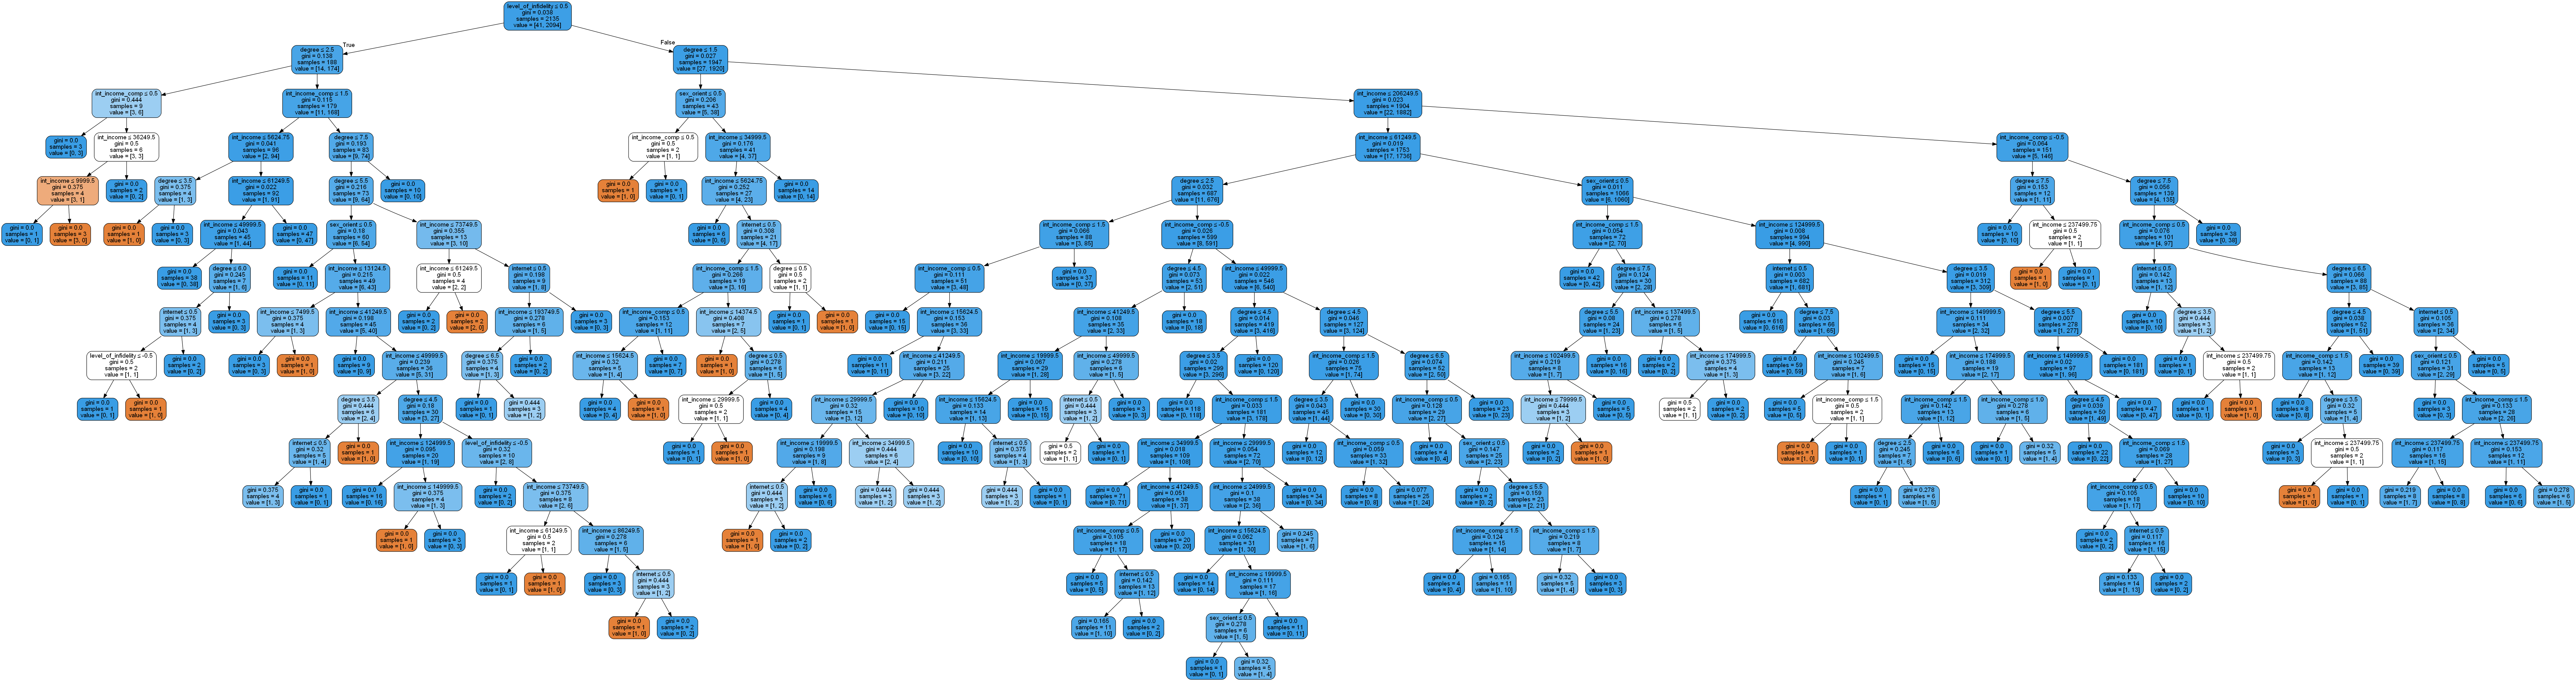

In [63]:
Image(graph.create_png())

<h1>Decision Trees: Limitations </h1>
<p> There are still limitations to our current model based on our dataset: </p>
<ol>
    <li>It is possible that there are systematic errors in the original dataset. The data collection process may not have been done in an experimental environment.</li>
    <li>Our model is trained by 80% of dataset and is used to predict the rest 20%. This could have lead to overfitting and by the unstable nature of decision tree we may not use this model to predict beyond our current dataset.</li>
    <li>Due to the lack of causal analysis, we cannot definitively say that cheating causes lower satisfaction in a relationship. </li>
    <li>In order to run the decision tree builder in the sklearn library, we transformed our categorical values into     numbers subjectively. It is possible that by doing this way our final result will be affected. For data including categorical variables with different number of levels, information gain in decision trees is biased in favor of those attributes with more levels.</li>
    <li>Decision trees always involve large amount of calculations. If our dataset gets larger we may run into performance issues, particularly if many values are uncertain and/or if many outcomes are linked.</li>
</ol>


## Ethical Consideration

<p style="font-size:15px">The dataset used in this study is on public display, found online through Stanford University’s Social Science Data Collection. All participants were 18 years of age or older and provided consent to participate in the survey used for this study. An oversample of LGBT couple information was taken to provide further insight on minority sexual orientation groups. All responses have been removed of identifiable information, prior to being on public display. Because our data analysis team did not have direct contact with those participating in the questionnaire or the team gathering the data, this further protects the privacy of the participants. The implications of this study may have effects on dating app companies, either raising or decreasing popularity, based on our findings. This would affect any stakeholders in the online dating industry. The data are nationally representative, as GfK recruits subjects into the panel by phone and by Address Based Sampling, and subjects without Internet access at home are given Internet access. Personal biases that may have an effect on how this study is conducted is our group’s minimal personal experience with online dating.
</p>

<h1>Decision Trees: Conclusion & Discussion </h1>
<p>
    Our 2nd decision tree model was very successful in predicting the labels of our testing data, with an accuracy of over 
    90%.
    <br>
    <br>
    Decision Tree Models attempt to place the features that have the highest impact in predicting the labels higher up the 
    tree. Based on our model, it seems that the features that have the highest impact are <b>level_of_infidelity</b> and <b>degree</b>, with <b>int_income</b> following after. 
    <br>
    <br> 
</p>
<p>In conclusion, our project consists of data cleaning and preprocessing, and running regression and decision tree models on the preprocessed data. Based on the above analysis, we conclude that the most important feature on determining the quality of a relationship was the <b>fidelity, or lack thereof, of the involved partners</b>. Members of society reading this project summary may draw upon it as a general guideline on what factors may lead to a relationship of higher quality, but they should err on the side of caution as we did not perform any causal analysis on the data.</p>
